# MTurk1 2AFC Training Initial Analysis

In [1]:
import pandas as pd
from dataloader import MTurk1BehaviorData
from runner import ExperimentManager
from matplotlib import pyplot as plt
import numpy as np
import torch

Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x7fdb2c2b44c0>
Traceback (most recent call last):
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/site-packages/llvmlite/binding/executionengine.py", line 171, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):
KeyboardInterrupt: 


KeyboardInterrupt: 

**load data from csv files**

In [13]:
jeeves_2afc_train = MTurk1BehaviorData('./data_files/fixed_jeevestrain_2afc_og.csv', dev='cpu', dataset_name='jeeves_2afc_train')
wooster_2afc_train = MTurk1BehaviorData('./data_files/fixed_woostertrain_2afc_og.csv', dev='cpu', dataset_name='wooster_2afc_train')

jeeves_2afc_probe = MTurk1BehaviorData('./data_files/fixed_jeevesprobe_2afc_og.csv', dev='cpu', dataset_name='jeeves_2afc_probe')
wooster_2afc_probe = MTurk1BehaviorData('./data_files/fixed_woosterprobe_2afc_og.csv', dev='cpu', dataset_name='wooster_2afc_probe')

jeeves_4afc_probe = MTurk1BehaviorData('./data_files/fixed_jeevesprobe_4afc_og.csv', dev='cuda', dataset_name='jeeves_4afc_probe')
wooster_4afc_probe = MTurk1BehaviorData('./data_files/fixed_woosterprobe_4afc_og.csv', dev='cuda', dataset_name='wooster_4afc_probe')
jocamo_4afc_probe = MTurk1BehaviorData('./data_files/fixed_jocamoprobe_4afc_og.csv', dev='cuda', dataset_name='jocamo_4afc_probe')

jeeves_4afc_train = MTurk1BehaviorData('./data_files/fixed_jeevestrain_4afc_og.csv', dev='cuda', dataset_name='jeeves_4afc_train')
wooster_4afc_train = MTurk1BehaviorData('./data_files/fixed_woostertrain_4afc_og.csv', dev='cuda', dataset_name='wooster_4afc_train')
jocamo_4afc_train = MTurk1BehaviorData('./data_files/fixed_jocamotrain_4afc_og.csv', dev='cuda', dataset_name='jocamo_4afc_train')

**Use below to load all pretrained models**

In [14]:
# paths to pretrained model binaries
train_2afc_model_paths = ["models/fixed_jeevestrain_2afc_og/Asnapshot_final_720.pkl",
                          "models/fixed_woostertrain_2afc_og/Asnapshot_final_720.pkl"]
train_2afc = ExperimentManager.from_trained("train_2afc", datasets=[jeeves_2afc_train, wooster_2afc_train], model_paths=train_2afc_model_paths, phase='train', dev='cpu')

train_4afc_model_paths = ["models/fixed_jeevestrain_4afc_og/Asnapshot_final_460.pkl",
                          "models/fixed_woostertrain_4afc_og/Asnapshot_final_390.pkl",
                          "models/fixed_jocamotrain_4afc_og/Asnapshot_final_540.pkl"]
train_4afc = ExperimentManager.from_trained("train_4afc", datasets=[jeeves_4afc_train, wooster_4afc_train, jocamo_4afc_train], model_paths=train_4afc_model_paths, phase='train')

probe_4afc_model_paths = ["./share/model/jeeves_probe_4afc_990.pkl",
                          "./share/model/wooster_probe_4afc_990.pkl",
                          "./share/model/jocamo_probe_4afc_990.pkl"]
probe_4afc = ExperimentManager.from_trained("probe_4afc", datasets=[jeeves_4afc_probe, wooster_4afc_probe, jocamo_4afc_probe], model_paths=train_4afc_model_paths, phase='probe')

In [5]:
# alternate load

## Explore the Data


Lets first look at a plot of all the colors shown as cues in the training data

KeyboardInterrupt: 

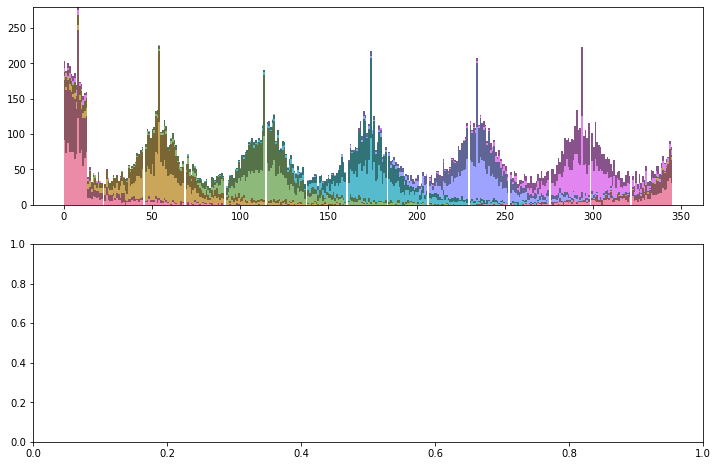

In [5]:
fig, axs = plt.subplots(2)
fig.set_size_inches(12, 8)
ax = train_2afc.plot_color_degree_frequencies(axs)

All cue colors were presented evenly and as expected from the given distributions

 ### Now lets look at error matrices of the monkeys choices in training data after reaching peak performance

First we look at the first 1000 trials to see any initial bias in the choices

In [15]:
%matplotlib qt
fig, ax = plt.subplots(7, 2)
fig.set_size_inches(24, 32)
train_2afc.plot_subject_confusion_matrices(ax, trial_start=0, trial_stop=2000, error_only=False, standardize=True)

array([[<AxesSubplot:title={'center':'jeeves_2afc_train: low_guass_colored_shape_to_color'}>,
        <AxesSubplot:title={'center':'wooster_2afc_train: low_guass_colored_shape_to_color'}>],
       [<AxesSubplot:title={'center':'jeeves_2afc_train: high_guass_colored_shape_to_color'}>,
        <AxesSubplot:title={'center':'wooster_2afc_train: high_guass_colored_shape_to_color'}>],
       [<AxesSubplot:title={'center':'jeeves_2afc_train: low_guass_colored_shape_to_shape'}>,
        <AxesSubplot:title={'center':'wooster_2afc_train: low_guass_colored_shape_to_shape'}>],
       [<AxesSubplot:title={'center':'jeeves_2afc_train: high_guass_colored_shape_to_shape'}>,
        <AxesSubplot:title={'center':'wooster_2afc_train: high_guass_colored_shape_to_shape'}>],
       [<AxesSubplot:title={'center':'jeeves_2afc_train: achromatic_shape_to_shape'}>,
        <AxesSubplot:title={'center':'wooster_2afc_train: achromatic_shape_to_shape'}>],
       [<AxesSubplot:title={'center':'jeeves_2afc_train: col

The most common type of error when the subject must choose colors is mistaking low and high luminance options.
Monkeys also seems more likely to confuse directly adjacent colors. Particular examples of this are 6 and 8 or 0 and 10 (note that shapes 0 and 10 are adjacent low luminance colors, since colors 12 and 13 are grays)

The subject also appears to often confuse achromatic shapes 0 and 10, which appear subjectively similar. Shape 0 is zigzag with one inflection, and shape 10 is a zigzag with two inflections.

In [18]:
%matplotlib qt
fig = plt.figure(figsize=(32, 32), dpi=300)
axs = [fig.add_subplot(1, 2, 1, projection='3d')]
axs, embeddings = train_2afc.create_similarity_space(axs, 0, -1, 'color', combine_subjects=True, algorithm='mds', embed_dim=3, converge_tolerance=.001)
plt.show()

not all cond present
Right Initial System Tension:  8.691482543945312
Right Final System Tension:  0.6910287737846375
all_subjects distance from others [18.860755145091016, 16.427643460467653, 17.410594252628805, 17.160701274966257, 16.760176057776913, 16.684074692341383, 16.581234384449626, 16.155170196789797, 16.178129860754336, 16.941654557440184, 16.364424504346008, 17.235177495293357]


In [21]:
%matplotlib qt
fig = plt.figure(figsize=(32, 32), dpi=400)
axs = [fig.add_subplot(1, 2, 1, projection='3d')]
axs, embeddings = train_4afc.create_similarity_space(axs, 0, 100000, 'color', combine_subjects=True, algorithm='mds', embed_dim=3, converge_tolerance=.0001)
plt.show()

not all cond present
Right Initial System Tension:  8.260181427001953
Right Final System Tension:  0.5651931762695312
all_subjects distance from others [19.618592701660592, 16.580380625947075, 17.20778596373992, 16.978991992114366, 16.990051107277026, 16.646013040206256, 15.867171259707543, 15.768358677491959, 16.616665800415195, 16.71484872779129, 16.910858322159754, 16.738309545039996]


In [11]:
%matplotlib qt
fig = plt.figure(figsize=(16, 8), dpi=300)
axs = []
axs.append(fig.add_subplot(1, 5, 1, projection='3d'))
axs.append(fig.add_subplot(1, 1, 1, projection='3d'))
axs, embeddings = train_4afc.create_similarity_space(axs, 0, -1, 'shape', combine_subjects=True, embed_dim=3)
plt.show()

KeyboardInterrupt: 

In [8]:
%matplotlib qt
fig = plt.figure(figsize=(16, 8), dpi=300)
axs = []
axs.append(fig.add_subplot(1, 2, 1, projection='3d'))
axs, embeddings = probe_4afc.create_similarity_space(axs, 0, -1, 'color', combine_subjects=True, embed_dim=3, converge_tolerance=.00001)
plt.show()

Right Initial System Tension:  8.752708435058594
Right Final System Tension:  0.49853694438934326
all_subjects distance from others [19.000471699443104, 15.203370553038587, 17.21007656386812, 16.482552917350585, 18.04592396174843, 16.559901751419954, 15.863895148249572, 15.64722290858655, 17.96410328503068, 17.718378468469716, 16.43723312502385, 16.39393992147998]


In [6]:
# binomial test warm vs cool inter-luminance
from scipy.stats import binomtest
from itertools import permutations

data, names = train_4afc.extract_data(-500000, -1, "color", combine_subjects=True)
data = data[0]
conf = train_4afc._get_confusion_matrix(data, standardize=False, error_only=True)

def sort_list(x):
    return sorted(list(x))

cool_indices = sort_list(train_4afc.cool_indices)
cool_indices_perm = list(set(permutations(cool_indices)))
print(sort_list(train_4afc.cool_indices))
cool_l2d_error = np.sum(conf[sort_list(train_4afc.cool_indices & train_4afc.light_indices), sort_list(train_4afc.cool_indices & train_4afc.dark_indices)])
cool_d2l_error = np.sum(conf[sort_list(train_4afc.cool_indices & train_4afc.dark_indices), sort_list(train_4afc.cool_indices & train_4afc.light_indices)])
cool_errors = np.sum(conf[cool_indices, cool_indices_perm])

warm_indices = sort_list(train_4afc.warm_indices)
warm_indices_perm = list(set(permutations(warm_indices)))
warm_l2d_error = np.sum(conf[sort_list(train_4afc.warm_indices & train_4afc.light_indices), sort_list(train_4afc.warm_indices & train_4afc.dark_indices)])
warm_d2l_error = np.sum(conf[sort_list(train_4afc.warm_indices & train_4afc.dark_indices), sort_list(train_4afc.warm_indices & train_4afc.light_indices)])
warm_errors = np.sum(conf[warm_indices, warm_indices_perm])

cool_lum_error_prob = (cool_l2d_error + cool_d2l_error) / cool_errors
res = binomtest(k=(warm_d2l_error + warm_l2d_error), n=warm_errors, p=cool_lum_error_prob, alternative='greater')
print("p_val warm <= cool inter-luminance errors", res.pvalue)

p_val warm <= cool inter-luminance errors 8.504258e-317
[6, 7, 8, 9]
p_val warm <= cool inter-luminance errors 8.504258e-317


In [7]:
# binomial test interhue errors warm vs cool
from scipy.stats import binomtest
from itertools import permutations

data, names = train_4afc.extract_data(-500000, -1, "color", combine_subjects=True)
data = data[0]
conf = train_4afc._get_confusion_matrix(data, standardize=False, error_only=True)

def sort_list(x):
    return sorted(list(x))

cool_indices = sort_list(train_4afc.cool_indices)
cool_indices_perm = list(set(permutations(cool_indices)))
print(sort_list(train_4afc.cool_indices))
cool_t2b_error = np.sum(conf[(6, 7), (8, 9)])
cool_b2t_error = np.sum(conf[(8, 9), (6, 7)])
cool_errors = np.sum(conf[cool_indices, cool_indices_perm])

warm_indices = sort_list(train_4afc.warm_indices)
warm_indices_perm = list(set(permutations(warm_indices)))
warm_r2y_error = np.sum(conf[(0, 1), (2, 3)])
warm_y2r_error = np.sum(conf[(2, 3), (0, 1)])
warm_errors = np.sum(conf[warm_indices, warm_indices_perm])

warm_hue_error_prob = (warm_r2y_error + warm_y2r_error) / warm_errors
res = binomtest(k=(cool_t2b_error + cool_b2t_error), n=cool_errors, p=warm_hue_error_prob, alternative='greater')
print("p_val cool <= warm inter-hue errors", res.pvalue)

[6, 7, 8, 9]
p_val cool <= warm inter-hue errors 0.0


## Learning Curves

The next two cells allow the model to learn freely from the data. It uses the learning rates, temperatures, and initial values learned during training, but makes all decisions independently now. This provides the cleanest view of model behavior

In [4]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
train_2afc.get_model_accuracy()

/home/ssbeast/Projects/SS/MT1RL/model.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  choice_probs = self.softmax(temp * option_exp)
/home/ssbeast/Projects/SS/MT1RL/model.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  choice_probs = self.softmax(temp * option_exp)


**Plot the accuracy over trials of the self learning model**

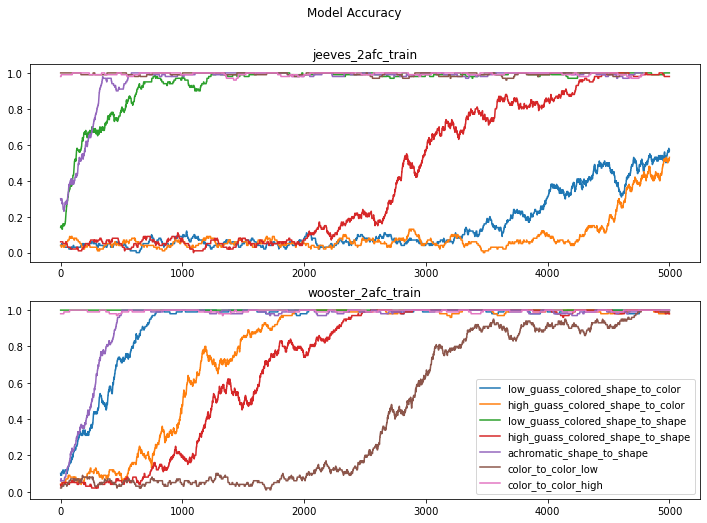

In [5]:
fig, axs = plt.subplots(2)
fig.set_size_inches(12, 8)
fig.suptitle("Model Accuracy")
axs = train_2afc.plot_learning_curves(axs, type="free_behavior", trials_to_plot=5000, window_size=100)
plt.legend()
plt.show()

**The next plot is just the subjects' accuracy on each condition over trials. Not informed by any RL model.**

In [6]:
train_2afc.get_subject_accuracy()

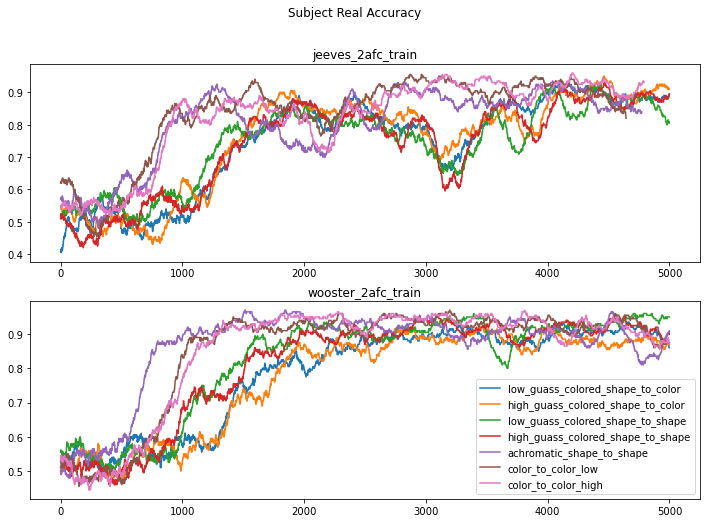

In [8]:
fig, axs = plt.subplots(2)
fig.set_size_inches(12, 8)
fig.suptitle("Subject Real Accuracy")
axs = train_2afc.plot_learning_curves(axs, type="subject_behavior", trials_to_plot=5000, window_size=200)
plt.legend()
plt.show()

**The next plot shows how probable the RL model believes the monkeys real actions are at each point in training. Should fairly closes match the true accuracy curve. I think that the initial above chance is due to the model fitting each monkeys initial biases.**

In [10]:
train_2afc.get_subject_choice_probs(overwrite=True, mp=True)

/home/ssbeast/Projects/SS/MT1RL/model.py:87: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  choice_probs = self.softmax(temp * option_exp)
/home/ssbeast/Projects/SS/MT1RL/model.py:87: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  choice_probs = self.softmax(temp * option_exp)


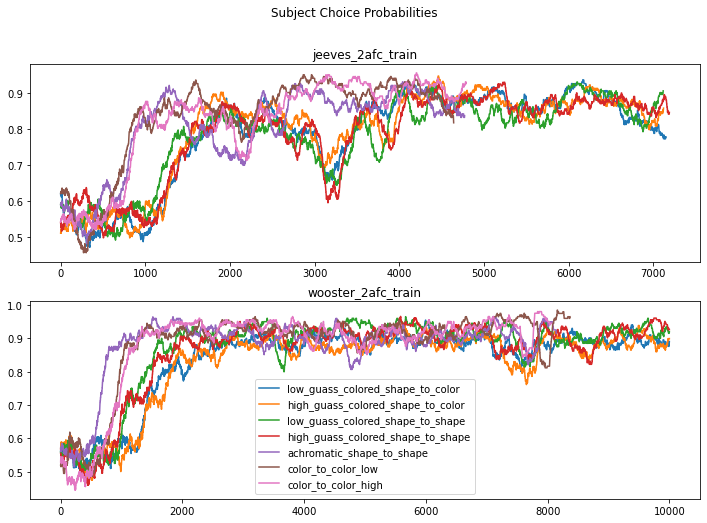

In [11]:
fig, axs = plt.subplots(2)
fig.set_size_inches(12, 8)
fig.suptitle("Subject Choice Probabilities")
axs = train_2afc.plot_learning_curves(axs, type="subject_probs", trials_to_plot=10000, window_size=200)
plt.legend()
plt.show()

In [ ]:
# model learning rates by condition
lr_data = {}
for i, model in enumerate(train_2afc.models):
    name = str(train_2afc.datasets[i])
    lr_data[name] = model.lrs.data.detach().cpu().tolist()
df = pd.DataFrame.from_dict(lr_data)
df.index = train_2afc.task_keys
df.head(6)

**For both subjects the colored shape to shape learning rates are higher than the colored shape to color learning rates.**

### Next are the estimated initial Value Matrices for each condition

In [ ]:
# initial q matrix heatmaps
# remapping conditions since display cats the lo / high guass
conditions = ['colored shape to color', 'colored shape to shape', 'achrom. shape to shape', 'color to color']
nq_q_w = train_2afc.models[1].q_init.cpu().detach().numpy().reshape(-1, 28, 28)
num_cond = nq_q_w.shape[0]
fig, axs = plt.subplots(num_cond, 2)
fig.set_size_inches(10, 16)
for j, m in enumerate(train_2afc.models):
    npq = m.q_init.cpu().detach().numpy().reshape(-1, 28, 28)
    for i, condition in enumerate(npq):
        axs[i, j].imshow(condition)
        axs[i, j].set_title(str(train_2afc.datasets[j]) + ': ' + conditions[i])

### Now plot final values matrices for each condition

In [ ]:
# final q heatmaps
# initial q matrix heatmaps
# remapping conditions since display cats the lo / high guass
conditions = ['colored shape to color', 'colored shape to shape', 'achrom. shape to shape', 'color to color']
nq_q_w = train_2afc.models[1].q_init.cpu().detach().numpy().reshape(-1, 28, 28)
num_cond = nq_q_w.shape[0]
fig, axs = plt.subplots(num_cond, 2)
fig.set_size_inches(10, 16)
for j, q in enumerate(train_2afc.subject_Q_estimates):
    npq = q[-1].reshape(-1, 28, 28)
    for i, condition in enumerate(npq):
        axs[i, j].imshow(condition)
        axs[i, j].set_title(str(train_2afc.datasets[j]) + ': ' + conditions[i])

### 4AFC Training

In [ ]:
jeeves_4afc_train = MTurk1BehaviorData('./data_files/fixed_jeevestrain_4afc_og.csv', dev='cuda', dataset_name='jeeves_4afc_train', trials_to_load=60000)
wooster_4afc_train = MTurk1BehaviorData('./data_files/fixed_woostertrain_4afc_og.csv', dev='cuda', dataset_name='wooster_4afc_train', trials_to_load=60000)
jocamo_4afc_train = MTurk1BehaviorData('./data_files/fixed_jocamotrain_4afc_og.csv', dev='cuda', dataset_name='jocamo_4afc_train', trials_to_load=75000)

In [ ]:
train_4afc = ExperimentManager(name="train_4afc", datasets=[jeeves_4afc_train, wooster_4afc_train, jocamo_4afc_train], phase='train', save_dirs=["/home/ssbeast/Projects/SS/MT1RL/models/fixed_jeevestrain_4afc_og", "/home/ssbeast/Projects/SS/MT1RL/models/fixed_woostertrain_4afc_og", "/home/ssbeast/Projects/SS/MT1RL/models/fixed_jocamotrain_4afc_og"])
train_4afc.fit(1000)
del train_4afc

Load from pretrained

In [ ]:
# paths to pretrained model binaries
train_4afc_model_paths = ["/home/ssbeast/Projects/SS/MT1RL/models/fixed_jeevestrain_4afc_og/snapshot990.pkl",
                          "/home/ssbeast/Projects/SS/MT1RL/models/fixed_woostertrain_4afc_og/snapshot990.pkl",
                          "/home/ssbeast/Projects/SS/MT1RL/models/fixed_jocamotrain_4afc_og/snapshot990.pkl"]
train_4afc = ExperimentManager.from_trained("train_4afc", datasets=[jeeves_4afc_train, wooster_4afc_train, jocamo_4afc_train], model_paths=train_4afc_model_paths, phase='train')

In [ ]:
train_4afc.get_model_accuracy()

In [ ]:
fig, axs = plt.subplots(3)
fig.set_size_inches(12, 12)
fig.suptitle("Model Accuracy")
axs = train_4afc.plot_learning_curves(axs, type="free_behavior", trials_to_plot=1000, window_size=100)
plt.legend()
plt.show()

In [ ]:
train_4afc.get_subject_accuracy()

In [ ]:
fig, axs = plt.subplots(3)
fig.set_size_inches(12, 12)
fig.suptitle("Subject Real Accuracy")
axs = train_4afc.plot_learning_curves(axs, type="subject_behavior", trials_to_plot=10000, window_size=200)
plt.legend()
plt.show()

In [ ]:
train_4afc.get_subject_choice_probs()

In [ ]:
fig, axs = plt.subplots(3)
fig.set_size_inches(12, 8)
fig.suptitle("Subject Choice Probabilities")
axs = train_4afc.plot_learning_curves(axs, type="subject_probs", trials_to_plot=10000, window_size=200)
plt.legend()
plt.show()

In [ ]:
# initial q matrix heatmaps
# remapping conditions since display cats the lo / high guass
conditions = ['colored shape to color', 'colored shape to shape', 'achrom. shape to shape', 'color to color']
num_cond = nq_q_w.shape[0]
fig, axs = plt.subplots(num_cond, 3)
fig.set_size_inches(20, 16)
for j, m in enumerate(train_4afc.models):
    npq = torch.sigmoid(m.q_init.cpu().detach()).numpy().reshape(-1, 28, 28)
    for i, condition in enumerate(npq):
        axs[i, j].imshow(condition, cmap='plasma')
        axs[i, j].set_title(str(train_4afc.datasets[j]) + ': ' + conditions[i])

In [ ]:
# final q heatmaps
# initial q matrix heatmaps
# remapping conditions since display cats the lo / high guass
import numpy as np
conditions = ['colored shape to color', 'colored shape to shape', 'achrom. shape to shape', 'color to color']
nq_q_w = train_4afc.models[1].q_init.cpu().detach().numpy().reshape(-1, 28, 28)
num_cond = nq_q_w.shape[0]
fig, axs = plt.subplots(num_cond, 3)
fig.set_size_inches(20, 16)
for j, q in enumerate(train_4afc.subject_Q_estimates):
    npq = torch.sigmoid(torch.from_numpy(q[-1])).numpy().reshape(-1, 28, 28)
    for i, condition in enumerate(npq):
        axs[i, j].imshow(condition, cmap='plasma')
        axs[i, j].set_title(str(train_4afc.datasets[j]) + ': ' + conditions[i])

## 4AFC Probe

In [ ]:
jeeves_4afc_probe = MTurk1BehaviorData('./data_files/fixed_jeevesprobe_4afc_og.csv', dev='cuda', dataset_name='jeeves_4afc_probe', trials_to_load=150000)
wooster_4afc_probe = MTurk1BehaviorData('./data_files/fixed_woosterprobe_4afc_og.csv', dev='cuda', dataset_name='wooster_4afc_probe', trials_to_load=150000)
jocamo_4afc_probe = MTurk1BehaviorData('./data_files/fixed_jocamoprobe_4afc_og.csv', dev='cuda', dataset_name='jocamo_4afc_probe', trials_to_load=150000)

In [ ]:
probe_4afc = ExperimentManager(name="train_4afc", datasets=[jeeves_4afc_probe, wooster_4afc_probe, jocamo_4afc_probe], phase='probe', save_dirs=["/home/ssbeast/Projects/SS/MT1RL/models/fixed_jeevesprobe_4afc_og", "/home/ssbeast/Projects/SS/MT1RL/models/fixed_woosterprobe_4afc_og", "/home/ssbeast/Projects/SS/MT1RL/models/fixed_jocamoprobe_4afc_og"])
probe_4afc.fit(1200)
del probe_4afc

In [ ]:
# paths to pretrained model binaries
probe_4afc_model_paths = ["/home/ssbeast/Projects/SS/MT1RL/models/fixed_jeevesprobe_4afc_og/final_snaphot.pkl",
                          "/home/ssbeast/Projects/SS/MT1RL/models/fixed_woosterprobe_4afc_og/final_snapshot.pkl",
                          "/home/ssbeast/Projects/SS/MT1RL/models/fixed_jocamoprobe_4afc_og/final_snapshot.pkl"]
probe_4afc = ExperimentManager.from_trained("train_4afc", datasets=[jeeves_4afc_probe, wooster_4afc_probe, jocamo_4afc_probe], model_paths=probe_4afc_model_paths, phase='probe')

In [ ]:
probe_4afc.get_subject_accuracy()

In [ ]:
fig, axs = plt.subplots(3)
fig.set_size_inches(12, 12)
fig.suptitle("Subject Real Accuracy")
axs = probe_4afc.plot_learning_curves(axs, type="subject_behavior", trials_to_plot=150000, window_size=200)
plt.legend()
plt.show()

In [ ]:
probe_4afc.get_subject_choice_probs()

In [ ]:
fig, axs = plt.subplots(3)
fig.set_size_inches(12, 12)
fig.suptitle("Subject Choice Probabilities")
axs = probe_4afc.plot_learning_curves(axs, type="subject_probs", trials_to_plot=150000, window_size=200)
plt.legend()
plt.show()

In [ ]:
# model learning rates by condition
lr_data = {}
for i, model in enumerate(probe_4afc.models):
    name = str(probe_4afc.datasets[i])
    lr_data[name] = abs(model.lrs.data.detach().cpu()).tolist()
df = pd.DataFrame.from_dict(lr_data)
df.index = probe_4afc.task_keys
df.head(10)

In [ ]:
# initial q matrix heatmaps
# remapping conditions since display cats the lo / high guass
conditions = ['colored shape to color', 'colored shape to shape', 'achrom. shape to shape', 'color to color']
num_cond = nq_q_w.shape[0]
fig, axs = plt.subplots(num_cond, 3)
fig.set_size_inches(20, 16)
for j, m in enumerate(probe_4afc.models):
    npq = torch.sigmoid(m.q_init.cpu().detach()).numpy().reshape(-1, 28, 28)
    for i, condition in enumerate(npq):
        axs[i, j].imshow(condition, cmap='plasma')
        axs[i, j].set_title(str(train_4afc.datasets[j]) + ': ' + conditions[i])

**Or use the below to start training. Will attempt to initialize CUDA ~45 min, otherwise will claim all but one CPU ~7hrs, 32core.**

In [ ]:
train_2afc = ExperimentManager(name="train_2afc", datasets=[jeeves_2afc_train, wooster_2afc_train], phase='train', save_dirs=["/home/ssbeast/Projects/SS/MT1RL/models/fixed_jeevestrain_2afc_og", "/home/ssbeast/Projects/SS/MT1RL/models/fixed_woostertrain_2afc_og"])
train_2afc.fit(1000)
del train_2afc

## Explore the Data


Lets first look at a plot of all the colors shown as cues in the training data

In [ ]:
fig, axs = plt.subplots(2)
train_2afc.plot_cue_color_degree_frequencies(axs)

## Learning Curves

The next two cells allow the model to learn freely from the data. It uses the learning rates, temperatures, and initial values learned during training, but makes all decisions independently now. This provides the cleanest view of model behavior

In [ ]:
train_2afc.get_model_accuracy()

**Plot the accuracy over trials of the self learning model**

In [ ]:
fig, axs = plt.subplots(2)
fig.set_size_inches(12, 8)
fig.suptitle("Model Accuracy")
axs = train_2afc.plot_learning_curves(axs, type="free_behavior", trials_to_plot=5000, window_size=100)
plt.legend()
plt.show()

**The next plot is just the subjects' accuracy on each condition over trials. Not informed by any RL model.**

In [ ]:
train_2afc.get_subject_accuracy()

In [ ]:
fig, axs = plt.subplots(2)
fig.set_size_inches(12, 8)
fig.suptitle("Subject Real Accuracy")
axs = train_2afc.plot_learning_curves(axs, type="subject_behavior", trials_to_plot=10000, window_size=200)
plt.legend()
plt.show()

**The next plot shows how probable the RL model believes the monkeys real actions are at each point in training. Should fairly closes match the true accuracy curve. I think that the initial above chance is due to the model fitting each monkeys initial biases.**

In [ ]:
train_2afc.get_subject_choice_probs()

In [ ]:
fig, axs = plt.subplots(2)
fig.set_size_inches(12, 8)
fig.suptitle("Subject Choice Probabilities")
axs = train_2afc.plot_learning_curves(axs, type="subject_probs", trials_to_plot=10000, window_size=200)
plt.legend()
plt.show()

In [ ]:
# model learning rates by condition
lr_data = {}
for i, model in enumerate(train_2afc.models):
    name = str(train_2afc.datasets[i])
    lr_data[name] = model.lrs.data.detach().cpu().tolist()
df = pd.DataFrame.from_dict(lr_data)
df.index = train_2afc.task_keys
df.head(6)

**For both subjects the colored shape to shape learning rates are higher than the colored shape to color learning rates.**

### Next are the estimated initial Value Matrices for each condition

In [ ]:
# initial q matrix heatmaps
# remapping conditions since display cats the lo / high guass
conditions = ['colored shape to color', 'colored shape to shape', 'achrom. shape to shape', 'color to color']
nq_q_w = train_2afc.models[1].q_init.cpu().detach().numpy().reshape(-1, 28, 28)
num_cond = nq_q_w.shape[0]
fig, axs = plt.subplots(num_cond, 2)
fig.set_size_inches(10, 16)
for j, m in enumerate(train_2afc.models):
    npq = m.q_init.cpu().detach().numpy().reshape(-1, 28, 28)
    for i, condition in enumerate(npq):
        axs[i, j].imshow(condition)
        axs[i, j].set_title(str(train_2afc.datasets[j]) + ': ' + conditions[i])

### Now plot final values matrices for each condition

In [ ]:
# final q heatmaps
# initial q matrix heatmaps
# remapping conditions since display cats the lo / high guass
conditions = ['colored shape to color', 'colored shape to shape', 'achrom. shape to shape', 'color to color']
nq_q_w = train_2afc.models[1].q_init.cpu().detach().numpy().reshape(-1, 28, 28)
num_cond = nq_q_w.shape[0]
fig, axs = plt.subplots(num_cond, 2)
fig.set_size_inches(10, 16)
for j, q in enumerate(train_2afc.subject_Q_estimates):
    npq = q[-1].reshape(-1, 28, 28)
    for i, condition in enumerate(npq):
        axs[i, j].imshow(condition)
        axs[i, j].set_title(str(train_2afc.datasets[j]) + ': ' + conditions[i])

### 4AFC Training

In [ ]:
jeeves_4afc_train = MTurk1BehaviorData('./data_files/fixed_jeevestrain_4afc_og.csv', dev='cuda', dataset_name='jeeves_4afc_train', trials_to_load=60000)
wooster_4afc_train = MTurk1BehaviorData('./data_files/fixed_woostertrain_4afc_og.csv', dev='cuda', dataset_name='wooster_4afc_train', trials_to_load=60000)
jocamo_4afc_train = MTurk1BehaviorData('./data_files/fixed_jocamotrain_4afc_og.csv', dev='cuda', dataset_name='jocamo_4afc_train', trials_to_load=75000)

In [ ]:
train_4afc = ExperimentManager(name="train_4afc", datasets=[jeeves_4afc_train, wooster_4afc_train, jocamo_4afc_train], phase='train', save_dirs=["/home/ssbeast/Projects/SS/MT1RL/models/fixed_jeevestrain_4afc_og", "/home/ssbeast/Projects/SS/MT1RL/models/fixed_woostertrain_4afc_og", "/home/ssbeast/Projects/SS/MT1RL/models/fixed_jocamotrain_4afc_og"])
train_4afc.fit(1000)
del train_4afc

Load from pretrained

In [ ]:
# paths to pretrained model binaries
train_4afc_model_paths = ["/home/ssbeast/Projects/SS/MT1RL/models/fixed_jeevestrain_4afc_og/snapshot990.pkl",
                          "/home/ssbeast/Projects/SS/MT1RL/models/fixed_woostertrain_4afc_og/snapshot990.pkl",
                          "/home/ssbeast/Projects/SS/MT1RL/models/fixed_jocamotrain_4afc_og/snapshot990.pkl"]
train_4afc = ExperimentManager.from_trained("train_4afc", datasets=[jeeves_4afc_train, wooster_4afc_train, jocamo_4afc_train], model_paths=train_4afc_model_paths, phase='train')

In [ ]:
train_4afc.get_model_accuracy()

In [ ]:
fig, axs = plt.subplots(3)
fig.set_size_inches(12, 12)
fig.suptitle("Model Accuracy")
axs = train_4afc.plot_learning_curves(axs, type="free_behavior", trials_to_plot=1000, window_size=100)
plt.legend()
plt.show()

In [ ]:
train_4afc.get_subject_accuracy()

In [ ]:
fig, axs = plt.subplots(3)
fig.set_size_inches(12, 12)
fig.suptitle("Subject Real Accuracy")
axs = train_4afc.plot_learning_curves(axs, type="subject_behavior", trials_to_plot=10000, window_size=200)
plt.legend()
plt.show()

In [ ]:
train_4afc.get_subject_choice_probs()

In [ ]:
fig, axs = plt.subplots(3)
fig.set_size_inches(12, 8)
fig.suptitle("Subject Choice Probabilities")
axs = train_4afc.plot_learning_curves(axs, type="subject_probs", trials_to_plot=10000, window_size=200)
plt.legend()
plt.show()

In [ ]:
# initial q matrix heatmaps
# remapping conditions since display cats the lo / high guass
conditions = ['colored shape to color', 'colored shape to shape', 'achrom. shape to shape', 'color to color']
num_cond = nq_q_w.shape[0]
fig, axs = plt.subplots(num_cond, 3)
fig.set_size_inches(20, 16)
for j, m in enumerate(train_4afc.models):
    npq = torch.sigmoid(m.q_init.cpu().detach()).numpy().reshape(-1, 28, 28)
    for i, condition in enumerate(npq):
        axs[i, j].imshow(condition, cmap='plasma')
        axs[i, j].set_title(str(train_4afc.datasets[j]) + ': ' + conditions[i])

In [ ]:
# final q heatmaps
# initial q matrix heatmaps
# remapping conditions since display cats the lo / high guass
import numpy as np
conditions = ['colored shape to color', 'colored shape to shape', 'achrom. shape to shape', 'color to color']
nq_q_w = train_4afc.models[1].q_init.cpu().detach().numpy().reshape(-1, 28, 28)
num_cond = nq_q_w.shape[0]
fig, axs = plt.subplots(num_cond, 3)
fig.set_size_inches(20, 16)
for j, q in enumerate(train_4afc.subject_Q_estimates):
    npq = torch.sigmoid(torch.from_numpy(q[-1])).numpy().reshape(-1, 28, 28)
    for i, condition in enumerate(npq):
        axs[i, j].imshow(condition, cmap='plasma')
        axs[i, j].set_title(str(train_4afc.datasets[j]) + ': ' + conditions[i])

## 4AFC Probe

In [ ]:
jeeves_4afc_probe = MTurk1BehaviorData('./data_files/fixed_jeevesprobe_4afc_og.csv', dev='cuda', dataset_name='jeeves_4afc_probe', trials_to_load=150000)
wooster_4afc_probe = MTurk1BehaviorData('./data_files/fixed_woosterprobe_4afc_og.csv', dev='cuda', dataset_name='wooster_4afc_probe', trials_to_load=150000)
jocamo_4afc_probe = MTurk1BehaviorData('./data_files/fixed_jocamoprobe_4afc_og.csv', dev='cuda', dataset_name='jocamo_4afc_probe', trials_to_load=150000)

In [ ]:
probe_4afc = ExperimentManager(name="train_4afc", datasets=[jeeves_4afc_probe, wooster_4afc_probe, jocamo_4afc_probe], phase='probe', save_dirs=["/home/ssbeast/Projects/SS/MT1RL/models/fixed_jeevesprobe_4afc_og", "/home/ssbeast/Projects/SS/MT1RL/models/fixed_woosterprobe_4afc_og", "/home/ssbeast/Projects/SS/MT1RL/models/fixed_jocamoprobe_4afc_og"])
probe_4afc.fit(1200)
del probe_4afc

In [ ]:
# paths to pretrained model binaries
probe_4afc_model_paths = ["/home/ssbeast/Projects/SS/MT1RL/models/fixed_jeevesprobe_4afc_og/final_snaphot.pkl",
                          "/home/ssbeast/Projects/SS/MT1RL/models/fixed_woosterprobe_4afc_og/final_snapshot.pkl",
                          "/home/ssbeast/Projects/SS/MT1RL/models/fixed_jocamoprobe_4afc_og/final_snapshot.pkl"]
probe_4afc = ExperimentManager.from_trained("train_4afc", datasets=[jeeves_4afc_probe, wooster_4afc_probe, jocamo_4afc_probe], model_paths=probe_4afc_model_paths, phase='probe')

In [ ]:
probe_4afc.get_subject_accuracy()

In [ ]:
fig, axs = plt.subplots(3)
fig.set_size_inches(12, 12)
fig.suptitle("Subject Real Accuracy")
axs = probe_4afc.plot_learning_curves(axs, type="subject_behavior", trials_to_plot=150000, window_size=200)
plt.legend()
plt.show()

In [ ]:
probe_4afc.get_subject_choice_probs()

In [ ]:
fig, axs = plt.subplots(3)
fig.set_size_inches(12, 12)
fig.suptitle("Subject Choice Probabilities")
axs = probe_4afc.plot_learning_curves(axs, type="subject_probs", trials_to_plot=150000, window_size=200)
plt.legend()
plt.show()

In [ ]:
# model learning rates by condition
lr_data = {}
for i, model in enumerate(probe_4afc.models):
    name = str(probe_4afc.datasets[i])
    lr_data[name] = abs(model.lrs.data.detach().cpu()).tolist()
df = pd.DataFrame.from_dict(lr_data)
df.index = probe_4afc.task_keys
df.head(10)

In [ ]:
# initial q matrix heatmaps
# remapping conditions since display cats the lo / high guass
conditions = ['colored shape to color', 'colored shape to shape', 'achrom. shape to shape', 'color to color']
num_cond = nq_q_w.shape[0]
fig, axs = plt.subplots(num_cond, 3)
fig.set_size_inches(20, 16)
for j, m in enumerate(probe_4afc.models):
    npq = torch.sigmoid(m.q_init.cpu().detach()).numpy().reshape(-1, 28, 28)
    for i, condition in enumerate(npq):
        axs[i, j].imshow(condition, cmap='plasma')
        axs[i, j].set_title(str(train_4afc.datasets[j]) + ': ' + conditions[i])

**Or use the below to start training. Will attempt to initialize CUDA ~45 min, otherwise will claim all but one CPU ~7hrs, 32core.**

In [3]:
train_2afc = ExperimentManager(name="train_2afc", datasets=[jeeves_2afc_train, wooster_2afc_train], phase='train', save_dirs=["/home/ssbeast/Projects/SS/MT1RL/models/fixed_jeevestrain_2afc_og", "/home/ssbeast/Projects/SS/MT1RL/models/fixed_woostertrain_2afc_og"])
train_2afc.fit(1000)
del train_2afc

**********
 jeeves_2afc_train EPOCH 0
liklihood tensor([17391.2324], device='cuda:0', grad_fn=<AddBackward0>) 
learning rates Parameter containing:
tensor([0.0091, 0.0079, 0.0109, 0.0081, 0.0102, 0.0123], device='cuda:0',
       requires_grad=True) 
temperatures Parameter containing:
tensor([2.3336, 2.1414, 1.8891, 1.8923, 2.0746, 1.8216], device='cuda:0',
       requires_grad=True) 
**********
**********
 wooster_2afc_train EPOCH 0
liklihood tensor([17667.4688], device='cuda:0', grad_fn=<AddBackward0>) 
learning rates Parameter containing:
tensor([0.0103, 0.0100, 0.0098, 0.0097, 0.0075, 0.0068], device='cuda:0',
       requires_grad=True) 
temperatures Parameter containing:
tensor([2.0855, 2.1460, 1.7176, 1.5847, 2.2541, 1.5544], device='cuda:0',
       requires_grad=True) 
**********
**********
 jeeves_2afc_train EPOCH 1
liklihood tensor([18049.9492], device='cuda:0', grad_fn=<AddBackward0>) 
learning rates Parameter containing:
tensor([0.0191, 0.0179, 0.0209, 0.0181, 0.0202, 0.0223]

/home/ssbeast/Projects/SS/MT1RL/model.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  choice_probs = self.softmax(temp * option_exp)


## Learning Curves

The next two cells allow the model to learn freely from the data. It uses the learning rates, temperatures, and initial values learned during training, but makes all decisions independently now. This provides the cleanest view of model behavior

In [ ]:
train_2afc.get_model_accuracy()

**Plot the accuracy over trials of the self learning model**

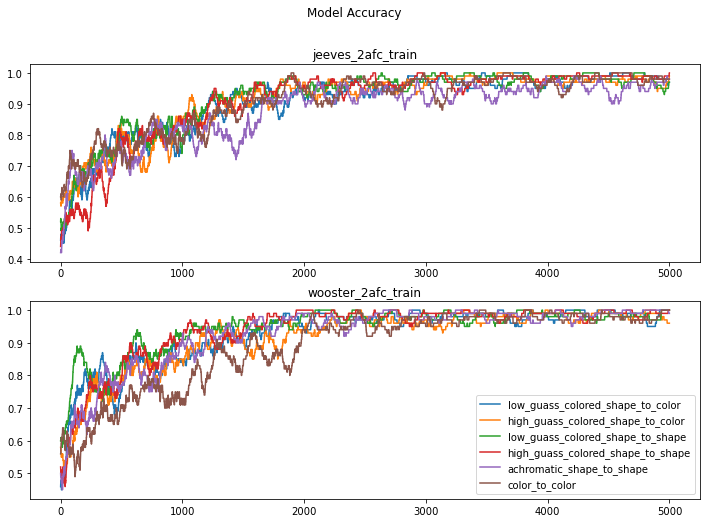

In [8]:
fig, axs = plt.subplots(2)
fig.set_size_inches(12, 8)
fig.suptitle("Model Accuracy")
axs = train_2afc.plot_learning_curves(axs, type="free_behavior", trials_to_plot=5000, window_size=100)
plt.legend()
plt.show()

**The next plot is just the subjects' accuracy on each condition over trials. Not informed by any RL model.**

In [10]:
train_2afc.get_subject_accuracy()

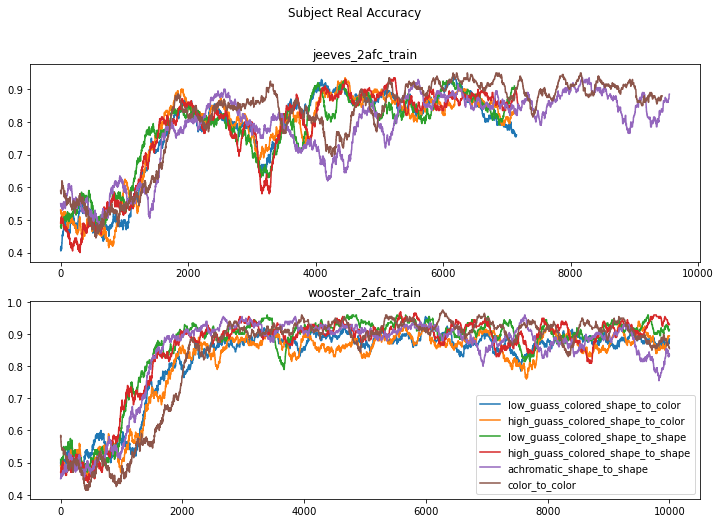

In [11]:
fig, axs = plt.subplots(2)
fig.set_size_inches(12, 8)
fig.suptitle("Subject Real Accuracy")
axs = train_2afc.plot_learning_curves(axs, type="subject_behavior", trials_to_plot=10000, window_size=200)
plt.legend()
plt.show()

**The next plot shows how probable the RL model believes the monkeys real actions are at each point in training. Should fairly closes match the true accuracy curve. I think that the initial above chance is due to the model fitting each monkeys initial biases.**

In [ ]:
train_2afc.get_subject_choice_probs()

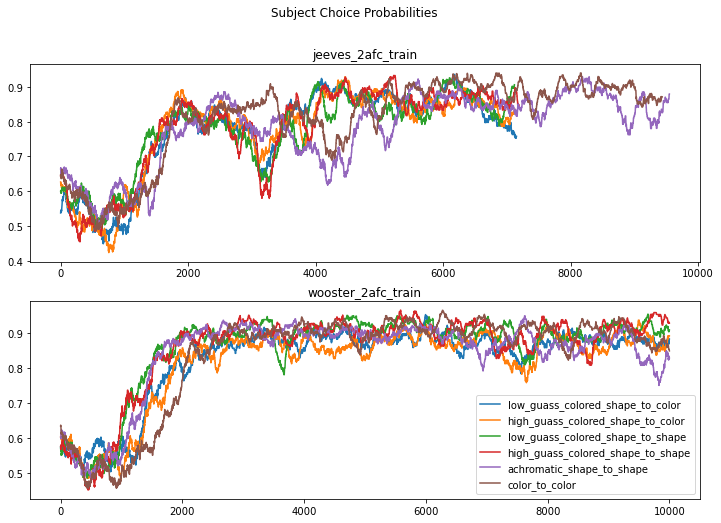

In [14]:
fig, axs = plt.subplots(2)
fig.set_size_inches(12, 8)
fig.suptitle("Subject Choice Probabilities")
axs = train_2afc.plot_learning_curves(axs, type="subject_probs", trials_to_plot=10000, window_size=200)
plt.legend()
plt.show()

In [33]:
# model learning rates by condition
lr_data = {}
for i, model in enumerate(train_2afc.models):
    name = str(train_2afc.datasets[i])
    lr_data[name] = model.lrs.data.detach().cpu().tolist()
df = pd.DataFrame.from_dict(lr_data)
df.index = train_2afc.task_keys
df.head(6)

jeeves_2afc_train  wooster_2afc_train
low_guass_colored_shape_to_color            0.349569            0.393866
high_guass_colored_shape_to_color           0.337107            0.337792
low_guass_colored_shape_to_shape            0.371530            0.394641
high_guass_colored_shape_to_shape           0.437134            0.471019
achromatic_shape_to_shape                   0.383894            0.563207
color_to_color                              0.423925            0.536848

**For both subjects the colored shape to shape learning rates are higher than the colored shape to color learning rates.**

### Next are the estimated initial Value Matrices for each condition

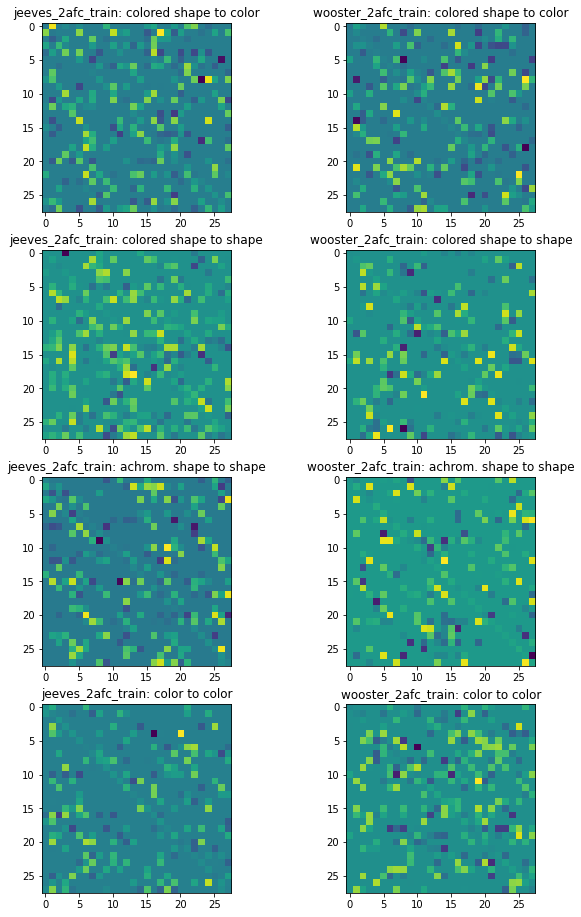

In [23]:
# initial q matrix heatmaps
# remapping conditions since display cats the lo / high guass
conditions = ['colored shape to color', 'colored shape to shape', 'achrom. shape to shape', 'color to color']
nq_q_w = train_2afc.models[1].q_init.cpu().detach().numpy().reshape(-1, 28, 28)
num_cond = nq_q_w.shape[0]
fig, axs = plt.subplots(num_cond, 2)
fig.set_size_inches(10, 16)
for j, m in enumerate(train_2afc.models):
    npq = m.q_init.cpu().detach().numpy().reshape(-1, 28, 28)
    for i, condition in enumerate(npq):
        axs[i, j].imshow(condition)
        axs[i, j].set_title(str(train_2afc.datasets[j]) + ': ' + conditions[i])

### Now plot final values matrices for each condition

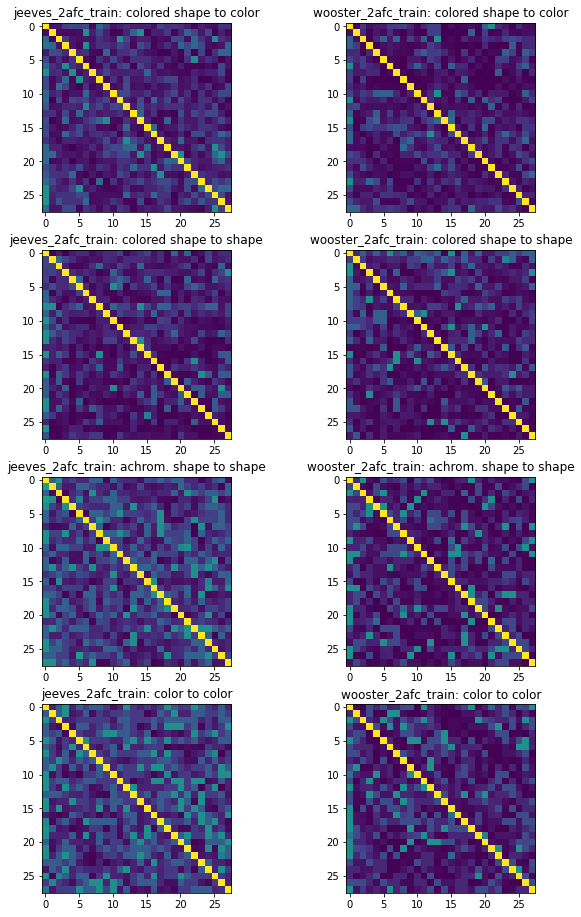

In [24]:
# final q heatmaps
# initial q matrix heatmaps
# remapping conditions since display cats the lo / high guass
conditions = ['colored shape to color', 'colored shape to shape', 'achrom. shape to shape', 'color to color']
nq_q_w = train_2afc.models[1].q_init.cpu().detach().numpy().reshape(-1, 28, 28)
num_cond = nq_q_w.shape[0]
fig, axs = plt.subplots(num_cond, 2)
fig.set_size_inches(10, 16)
for j, q in enumerate(train_2afc.subject_Q_estimates):
    npq = q[-1].reshape(-1, 28, 28)
    for i, condition in enumerate(npq):
        axs[i, j].imshow(condition)
        axs[i, j].set_title(str(train_2afc.datasets[j]) + ': ' + conditions[i])

### 4AFC Training

In [3]:
jeeves_4afc_train = MTurk1BehaviorData('./data_files/fixed_jeevestrain_4afc_og.csv', dev='cuda', dataset_name='jeeves_4afc_train', trials_to_load=60000)
wooster_4afc_train = MTurk1BehaviorData('./data_files/fixed_woostertrain_4afc_og.csv', dev='cuda', dataset_name='wooster_4afc_train', trials_to_load=60000)
jocamo_4afc_train = MTurk1BehaviorData('./data_files/fixed_jocamotrain_4afc_og.csv', dev='cuda', dataset_name='jocamo_4afc_train', trials_to_load=75000)

In [5]:
train_4afc = ExperimentManager(name="train_4afc", datasets=[jeeves_4afc_train, wooster_4afc_train, jocamo_4afc_train], phase='train', save_dirs=["/home/ssbeast/Projects/SS/MT1RL/models/fixed_jeevestrain_4afc_og", "/home/ssbeast/Projects/SS/MT1RL/models/fixed_woostertrain_4afc_og", "/home/ssbeast/Projects/SS/MT1RL/models/fixed_jocamotrain_4afc_og"])
train_4afc.fit(1000)
del train_4afc

**********
 wooster_4afc_train EPOCH 0
liklihood tensor([23261.9199], device='cuda:0', grad_fn=<AddBackward0>) 
learning rates Parameter containing:
tensor([0.0111, 0.0073, 0.0127, 0.0109, 0.0083, 0.0084], device='cuda:0',
       requires_grad=True) 
temperatures Parameter containing:
tensor([2.1526, 1.8379, 1.7697, 1.8153, 1.9502, 1.8190], device='cuda:0',
       requires_grad=True) 
**********
**********
 jeeves_4afc_train EPOCH 0
liklihood tensor([22955.9355], device='cuda:0', grad_fn=<AddBackward0>) 
learning rates Parameter containing:
tensor([0.0088, 0.0115, 0.0112, 0.0089, 0.0110, 0.0091], device='cuda:0',
       requires_grad=True) 
temperatures Parameter containing:
tensor([2.0982, 1.8994, 2.1325, 1.7138, 1.6896, 2.2190], device='cuda:0',
       requires_grad=True) 
**********
**********
 jocamo_4afc_train EPOCH 0
liklihood tensor([29000.5957], device='cuda:0', grad_fn=<AddBackward0>) 
learning rates Parameter containing:
tensor([0.0072, 0.0092, 0.0077, 0.0115, 0.0126, 0.0114]

/home/ssbeast/Projects/SS/MT1RL/model.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  choice_probs = self.softmax(temp * option_exp)
/home/ssbeast/Projects/SS/MT1RL/model.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  choice_probs = self.softmax(temp * option_exp)


Load from pretrained

In [4]:
# paths to pretrained model binaries
train_4afc_model_paths = ["/home/ssbeast/Projects/SS/MT1RL/models/fixed_jeevestrain_4afc_og/snapshot990.pkl",
                          "/home/ssbeast/Projects/SS/MT1RL/models/fixed_woostertrain_4afc_og/snapshot990.pkl",
                          "/home/ssbeast/Projects/SS/MT1RL/models/fixed_jocamotrain_4afc_og/snapshot990.pkl"]
train_4afc = ExperimentManager.from_trained("train_4afc", datasets=[jeeves_4afc_train, wooster_4afc_train, jocamo_4afc_train], model_paths=train_4afc_model_paths, phase='train')

In [5]:
train_4afc.get_model_accuracy()

/home/ssbeast/Projects/SS/MT1RL/model.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  choice_probs = self.softmax(temp * option_exp)
/home/ssbeast/Projects/SS/MT1RL/model.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  choice_probs = self.softmax(temp * option_exp)
/home/ssbeast/Projects/SS/MT1RL/model.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  choice_probs = self.softmax(temp * option_exp)


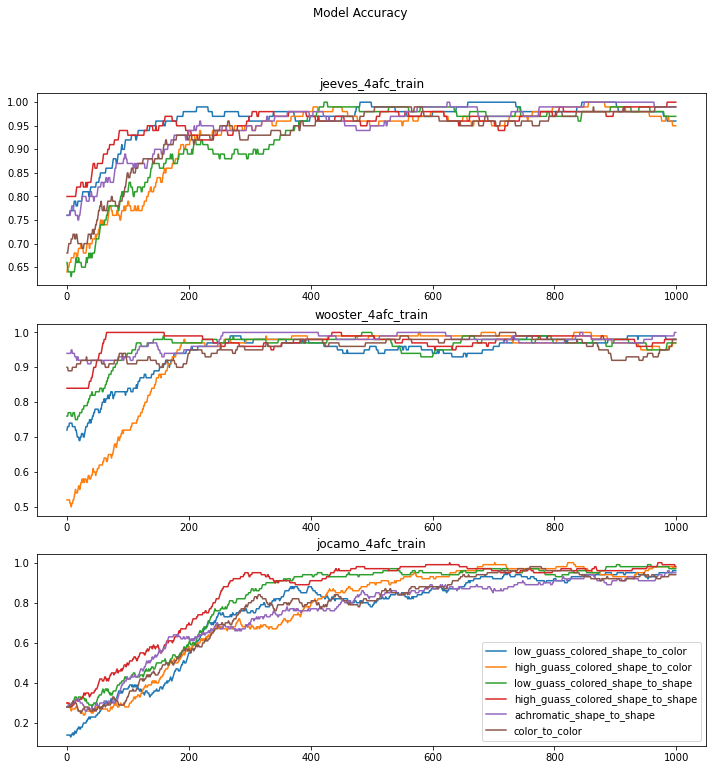

In [10]:
fig, axs = plt.subplots(3)
fig.set_size_inches(12, 12)
fig.suptitle("Model Accuracy")
axs = train_4afc.plot_learning_curves(axs, type="free_behavior", trials_to_plot=1000, window_size=100)
plt.legend()
plt.show()

In [11]:
train_4afc.get_subject_accuracy()

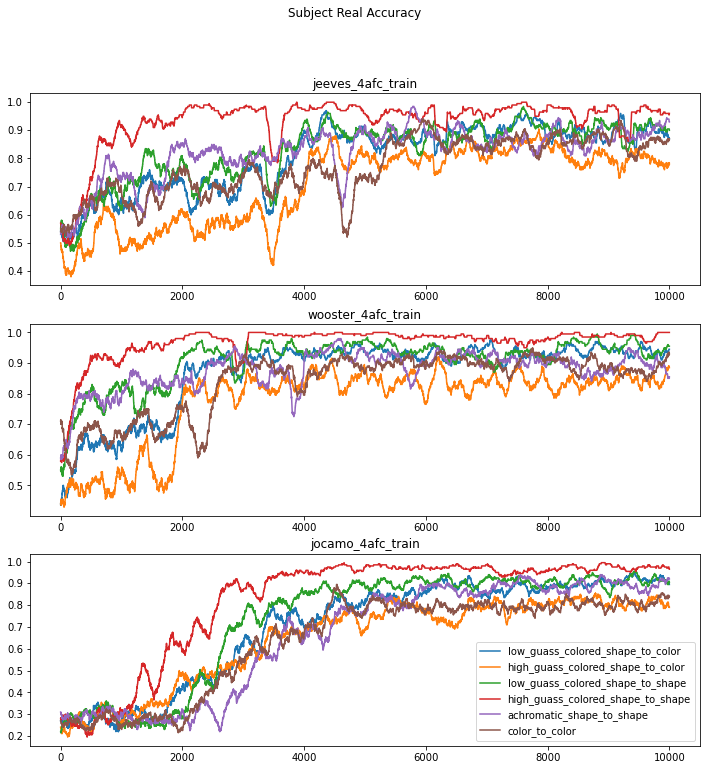

In [15]:
fig, axs = plt.subplots(3)
fig.set_size_inches(12, 12)
fig.suptitle("Subject Real Accuracy")
axs = train_4afc.plot_learning_curves(axs, type="subject_behavior", trials_to_plot=10000, window_size=200)
plt.legend()
plt.show()

In [16]:
train_4afc.get_subject_choice_probs()

/home/ssbeast/Projects/SS/MT1RL/model.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  choice_probs = self.softmax(temp * option_exp)
/home/ssbeast/Projects/SS/MT1RL/model.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  choice_probs = self.softmax(temp * option_exp)
/home/ssbeast/Projects/SS/MT1RL/model.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  choice_probs = self.softmax(temp * option_exp)


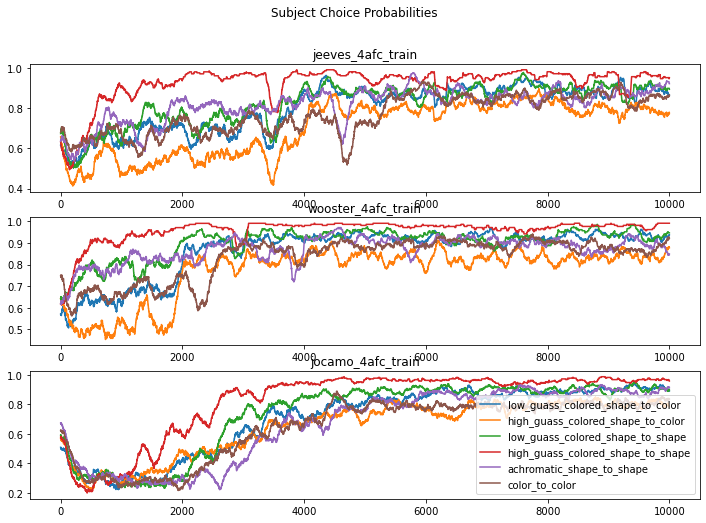

In [17]:
fig, axs = plt.subplots(3)
fig.set_size_inches(12, 8)
fig.suptitle("Subject Choice Probabilities")
axs = train_4afc.plot_learning_curves(axs, type="subject_probs", trials_to_plot=10000, window_size=200)
plt.legend()
plt.show()

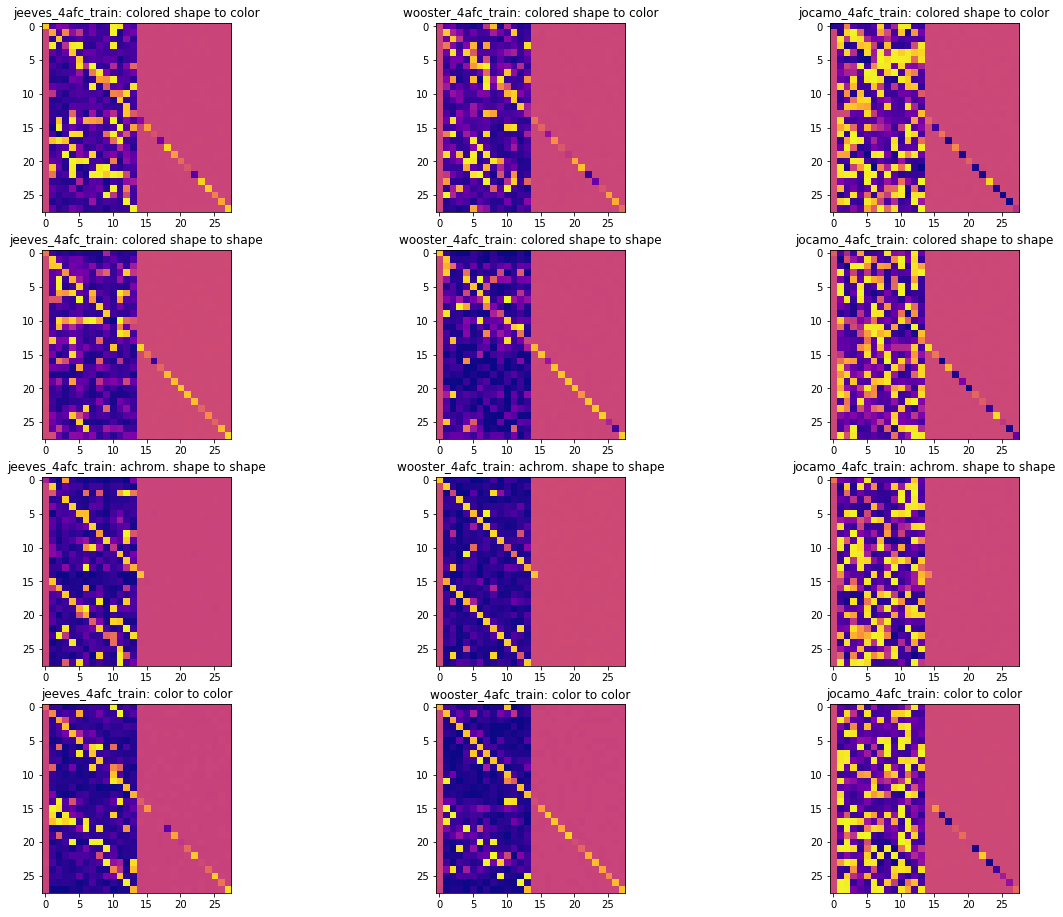

In [32]:
# initial q matrix heatmaps
# remapping conditions since display cats the lo / high guass
conditions = ['colored shape to color', 'colored shape to shape', 'achrom. shape to shape', 'color to color']
num_cond = nq_q_w.shape[0]
fig, axs = plt.subplots(num_cond, 3)
fig.set_size_inches(20, 16)
for j, m in enumerate(train_4afc.models):
    npq = torch.sigmoid(m.q_init.cpu().detach()).numpy().reshape(-1, 28, 28)
    for i, condition in enumerate(npq):
        axs[i, j].imshow(condition, cmap='plasma')
        axs[i, j].set_title(str(train_4afc.datasets[j]) + ': ' + conditions[i])

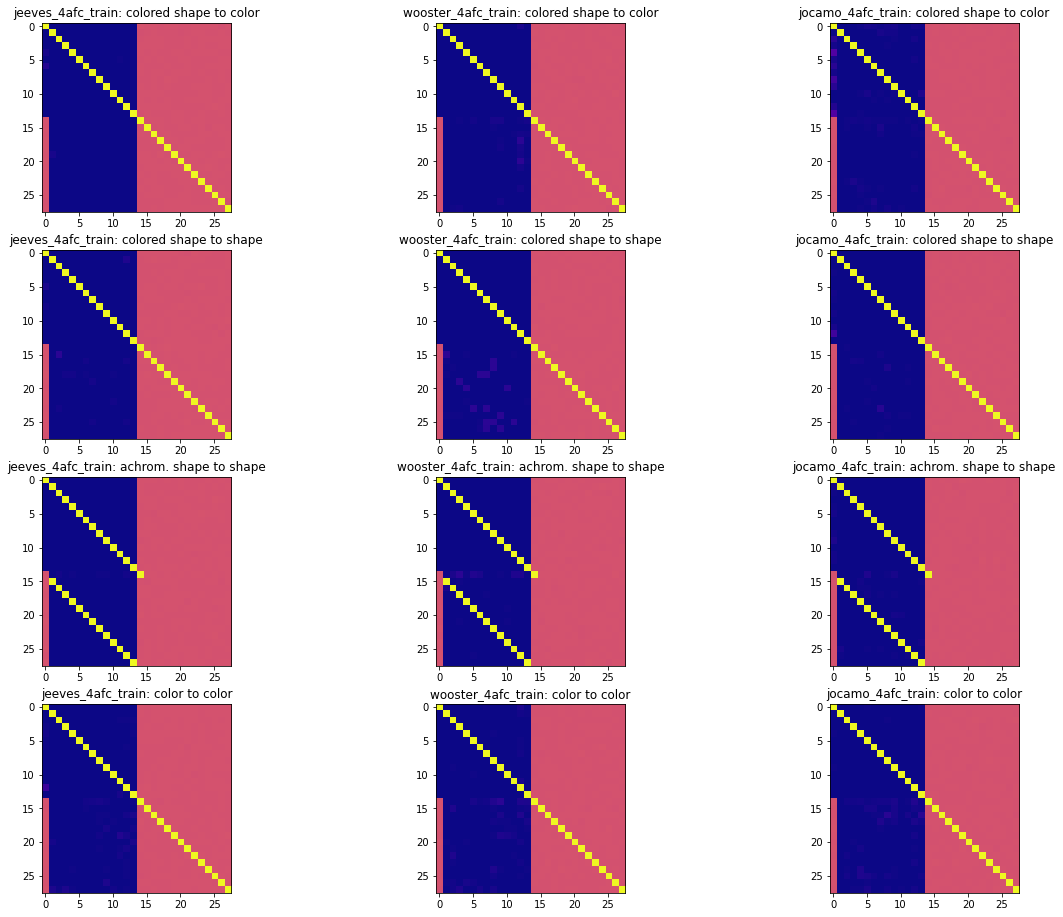

In [33]:
# final q heatmaps
# initial q matrix heatmaps
# remapping conditions since display cats the lo / high guass
import numpy as np
conditions = ['colored shape to color', 'colored shape to shape', 'achrom. shape to shape', 'color to color']
nq_q_w = train_4afc.models[1].q_init.cpu().detach().numpy().reshape(-1, 28, 28)
num_cond = nq_q_w.shape[0]
fig, axs = plt.subplots(num_cond, 3)
fig.set_size_inches(20, 16)
for j, q in enumerate(train_4afc.subject_Q_estimates):
    npq = torch.sigmoid(torch.from_numpy(q[-1])).numpy().reshape(-1, 28, 28)
    for i, condition in enumerate(npq):
        axs[i, j].imshow(condition, cmap='plasma')
        axs[i, j].set_title(str(train_4afc.datasets[j]) + ': ' + conditions[i])

## 4AFC Probe

In [34]:
jeeves_4afc_probe = MTurk1BehaviorData('./data_files/fixed_jeevesprobe_4afc_og.csv', dev='cuda', dataset_name='jeeves_4afc_probe', trials_to_load=150000)
wooster_4afc_probe = MTurk1BehaviorData('./data_files/fixed_woosterprobe_4afc_og.csv', dev='cuda', dataset_name='wooster_4afc_probe', trials_to_load=150000)
jocamo_4afc_probe = MTurk1BehaviorData('./data_files/fixed_jocamoprobe_4afc_og.csv', dev='cuda', dataset_name='jocamo_4afc_probe', trials_to_load=150000)

In [7]:
probe_4afc = ExperimentManager(name="train_4afc", datasets=[jeeves_4afc_probe, wooster_4afc_probe, jocamo_4afc_probe], phase='probe', save_dirs=["/home/ssbeast/Projects/SS/MT1RL/models/fixed_jeevesprobe_4afc_og", "/home/ssbeast/Projects/SS/MT1RL/models/fixed_woosterprobe_4afc_og", "/home/ssbeast/Projects/SS/MT1RL/models/fixed_jocamoprobe_4afc_og"])
probe_4afc.fit(1200)
del probe_4afc

**********
 wooster_4afc_probe EPOCH 0
liklihood tensor([65338.5039], device='cuda:0', grad_fn=<AddBackward0>) 
learning rates Parameter containing:
tensor([0.0103, 0.0121, 0.0066, 0.0106, 0.0090, 0.0123, 0.0106, 0.0099, 0.0104],
       device='cuda:0', requires_grad=True) 
temperatures Parameter containing:
tensor([1.9310, 1.6796, 1.6525, 2.1836, 2.1750, 2.0849, 1.9613, 1.8796, 2.1593],
       device='cuda:0', requires_grad=True) 
**********
**********
 jeeves_4afc_probe EPOCH 0
liklihood tensor([59155.8828], device='cuda:0', grad_fn=<AddBackward0>) 
learning rates Parameter containing:
tensor([0.0135, 0.0097, 0.0083, 0.0083, 0.0152, 0.0097, 0.0083, 0.0096, 0.0098],
       device='cuda:0', requires_grad=True) 
temperatures Parameter containing:
tensor([2.0267, 2.1451, 2.2497, 2.3297, 1.9394, 2.0688, 1.9568, 1.9424, 2.0307],
       device='cuda:0', requires_grad=True) 
**********
**********
 jocamo_4afc_probe EPOCH 0
liklihood tensor([62430.4062], device='cuda:0', grad_fn=<AddBackward0

Process SpawnPoolWorker-192:
Traceback (most recent call last):
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/multiprocessing/queues.py", line 355, in get
    with self._rlock:
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
Process SpawnPoolWorker-191:
Traceback (most recent call last):
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.

**********
 wooster_4afc_probe EPOCH 1077


/home/ssbeast/Projects/SS/MT1RL/model.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  choice_probs = self.softmax(temp * option_exp)
Process SpawnPoolWorker-130:
Traceback (most recent call last):
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/multiprocessing/pool.py", line 51, in starmapstar
    return list(itertools.starmap(args[0], args[1]))
  File "/home/ssbeast/Projects/SS/MT1RL/runner.py", line 52, in _fit_wrapper
    def _fit_wrapper(model, dataset, epochs):
  File "/home/ss

KeyboardInterrupt: 

In [38]:
# paths to pretrained model binaries
probe_4afc_model_paths = ["/home/ssbeast/Projects/SS/MT1RL/models/fixed_jeevesprobe_4afc_og/final_snaphot.pkl",
                          "/home/ssbeast/Projects/SS/MT1RL/models/fixed_woosterprobe_4afc_og/final_snapshot.pkl",
                          "/home/ssbeast/Projects/SS/MT1RL/models/fixed_jocamoprobe_4afc_og/final_snapshot.pkl"]
probe_4afc = ExperimentManager.from_trained("train_4afc", datasets=[jeeves_4afc_probe, wooster_4afc_probe, jocamo_4afc_probe], model_paths=probe_4afc_model_paths, phase='probe')

In [39]:
probe_4afc.get_subject_accuracy()

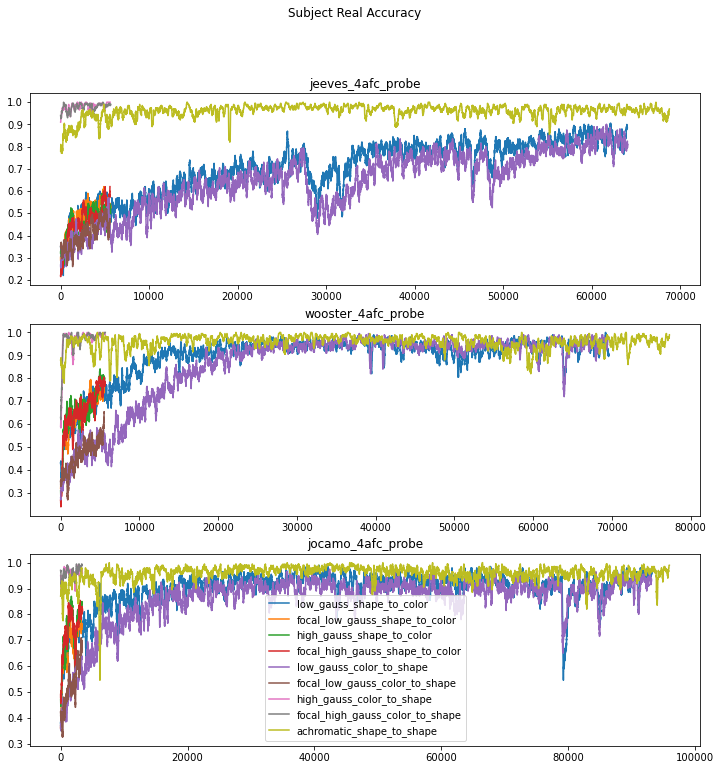

In [44]:
fig, axs = plt.subplots(3)
fig.set_size_inches(12, 12)
fig.suptitle("Subject Real Accuracy")
axs = probe_4afc.plot_learning_curves(axs, type="subject_behavior", trials_to_plot=150000, window_size=200)
plt.legend()
plt.show()

In [46]:
probe_4afc.get_subject_choice_probs()

/home/ssbeast/Projects/SS/MT1RL/model.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  choice_probs = self.softmax(temp * option_exp)
/home/ssbeast/Projects/SS/MT1RL/model.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  choice_probs = self.softmax(temp * option_exp)
/home/ssbeast/Projects/SS/MT1RL/model.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  choice_probs = self.softmax(temp * option_exp)


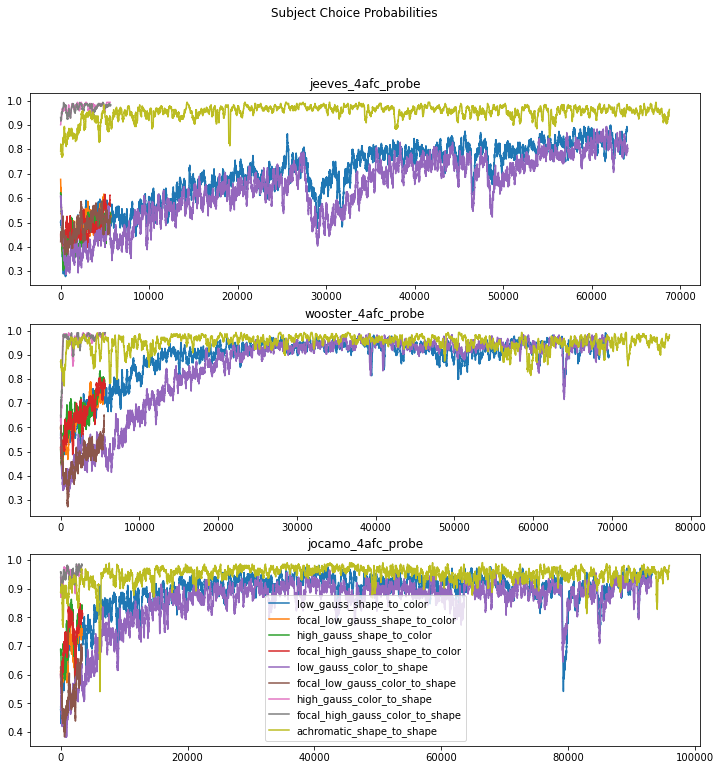

In [47]:
fig, axs = plt.subplots(3)
fig.set_size_inches(12, 12)
fig.suptitle("Subject Choice Probabilities")
axs = probe_4afc.plot_learning_curves(axs, type="subject_probs", trials_to_plot=150000, window_size=200)
plt.legend()
plt.show()

In [52]:
# model learning rates by condition
lr_data = {}
for i, model in enumerate(probe_4afc.models):
    name = str(probe_4afc.datasets[i])
    lr_data[name] = abs(model.lrs.data.detach().cpu()).tolist()
df = pd.DataFrame.from_dict(lr_data)
df.index = probe_4afc.task_keys
df.head(10)

jeeves_4afc_probe  wooster_4afc_probe  \
low_gauss_shape_to_color                  0.324828            0.503975   
focal_low_gauss_shape_to_color            0.354066            0.540686   
high_gauss_shape_to_color                 0.309520            0.506659   
focal_high_gauss_shape_to_color           0.032734            0.505222   
low_gauss_color_to_shape                  0.211974            0.356587   
focal_low_gauss_color_to_shape            0.000314            0.272727   
high_gauss_color_to_shape                 0.380051            0.633143   
focal_high_gauss_color_to_shape           0.439415            0.608473   
achromatic_shape_to_shape                 0.854131            0.872897   

                                 jocamo_4afc_probe  
low_gauss_shape_to_color                  0.538376  
focal_low_gauss_shape_to_color            0.590894  
high_gauss_shape_to_color                 0.656557  
focal_high_gauss_shape_to_color           0.612901  
low_gauss_color_to_shape                  0.424502  
focal_low_gauss_color_to_shape            0.180657  
high_gauss_color_to_shape                 0.433164  
focal_high_gauss_color_to_shape           0.449777  
achromatic_shape_to_shape                 0.977665

In [ ]:
# initial q matrix heatmaps
# remapping conditions since display cats the lo / high guass
conditions = ['colored shape to color', 'colored shape to shape', 'achrom. shape to shape', 'color to color']
num_cond = nq_q_w.shape[0]
fig, axs = plt.subplots(num_cond, 3)
fig.set_size_inches(20, 16)
for j, m in enumerate(probe_4afc.models):
    npq = torch.sigmoid(m.q_init.cpu().detach()).numpy().reshape(-1, 28, 28)
    for i, condition in enumerate(npq):
        axs[i, j].imshow(condition, cmap='plasma')
        axs[i, j].set_title(str(train_4afc.datasets[j]) + ': ' + conditions[i])